In [185]:
import numpy as np; np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns; sns.set()
%matplotlib inline

### Data Fields

### Orignal data analysis

In [68]:
#import training data and test data
df_train = pd.read_csv('./data/train.csv') 
df_test = pd.read_csv('./data/train.csv') 
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [69]:
df_test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


From the above results, it can be seen that most datatypes are numeric, except for datatime as object. For every column in the dataframes, the index all ranges from 0 to 10885. Therefore, both the training and test datasets are complete without nan values.

In [72]:
#Merge the training and test datasets for analysis
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)

In [73]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116149,0.166595,0.466148,0.633824,7.791411,8.474406,19.244591,8.164350,49.959329,151.035564,181.140294
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [74]:
# descriptive summary for bike counts
df.describe()['count']

count    21772.000000
mean       191.574132
std        181.140294
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

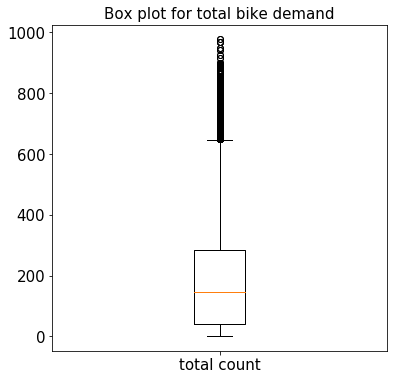

In [137]:
fig = plt.figure(figsize = (6, 6))

## Make the box plot of bike counts
_ = plt.boxplot(df['count'], labels = ['total count'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for total bike demand", fontsize = 15)

From the above results, the total count of bike demand ranges from min=1 to max=977 with an average of 192. As shown in the box plot, the outliers range from around 650 to 1000.

### Data visulization

In [77]:
#Split the datetime column into date and time

df_datetime = pd.DatetimeIndex(df['datetime'])
df['date'] = df_datetime.date
df['time'] = df_datetime.time
df['time'] = df['time'].astype(str)

#Extract hour from the time column
df['hour'] = df['time'].str[0:2].astype(int)

In [78]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,4


#### Demand vs hour

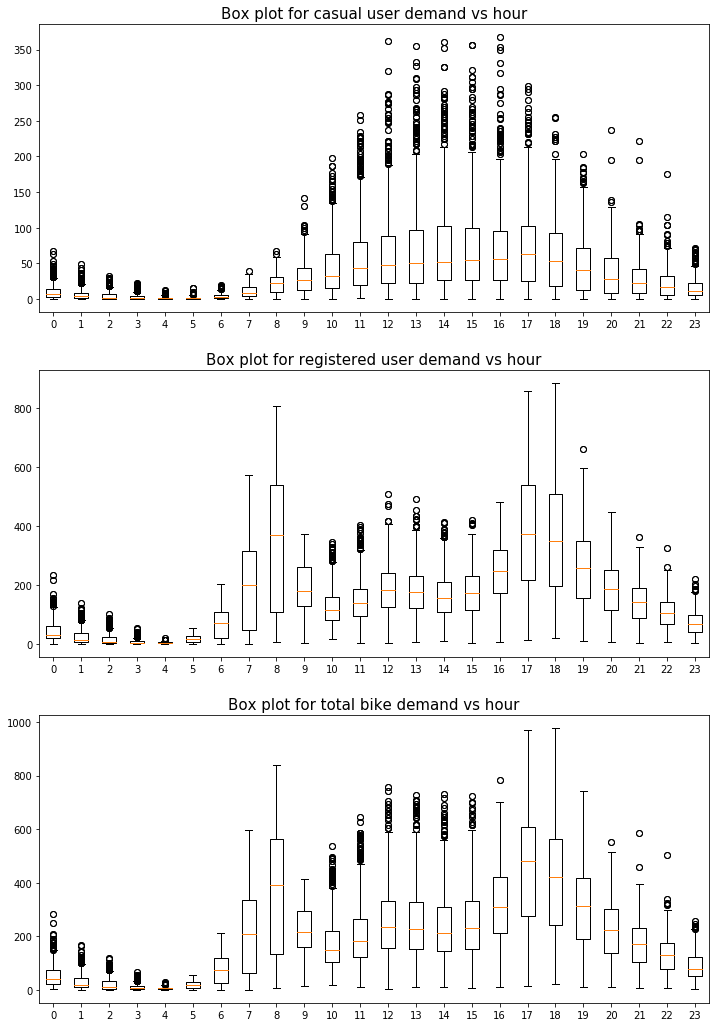

In [156]:
fig = plt.figure(figsize = (12, 18))

# Group the counts by each hour
hour_list = [df.index[df['hour'] == x].tolist() for x in range(0,24)] 
casual = [df['casual'][k] for k in [v for v in hour_list]]
registered = [df['registered'][k] for k in [v for v in hour_list]]
total = [df['count'][k] for k in [v for v in hour_list]]


# Make the boxplot of casual user demand vs hour
ax1 = fig.add_subplot(3,1,1)
_ = plt.boxplot(casual, labels = [x for x in range(0,24)])
plt.tick_params(labelsize = 10)
_ = plt.title("Box plot for casual user demand vs hour", fontsize = 15)


# Make the boxplot of registered user demand vs hour
ax2 = fig.add_subplot(3,1,2)
_ = plt.boxplot(registered, labels = [x for x in range(0,24)])
plt.tick_params(labelsize = 10)
_ = plt.title("Box plot for registered user demand vs hour", fontsize = 15)


# Make the boxplot of total demand vs hour
ax2 = fig.add_subplot(3,1,3)
_ = plt.boxplot(total, labels = [x for x in range(0,24)])
plt.tick_params(labelsize = 10)
_ = plt.title("Box plot for total bike demand vs hour", fontsize = 15)

From the above box plots, most the outliers are distributed in the groups from hour 10 to 15. 

For casual users, there are no obvious variation of bike demand between each group of hours.

For registered users, most of bike demand falls in the groups of the hour 7, 8, 17 and 18, which can be explained by the commuting peak during these hours. 

#### Demand vs season, temp and atemp

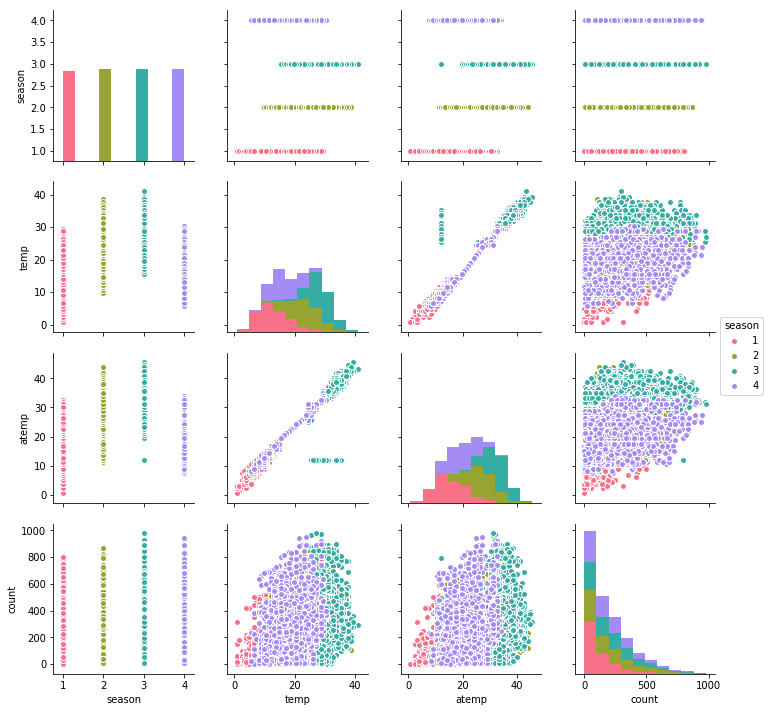

In [165]:
sns.pairplot(df[['season','temp','atemp','count']], hue='season', palette="husl")

Compared temp with seasons, the average temperature for spring is the lowest and for fall is the highest.

Compared temp and atemp, the relationship between them is almost linear.

From the scatter plots of count vs temp, there is a positive correlation between them.

#### Demand vs humidity and windspeed

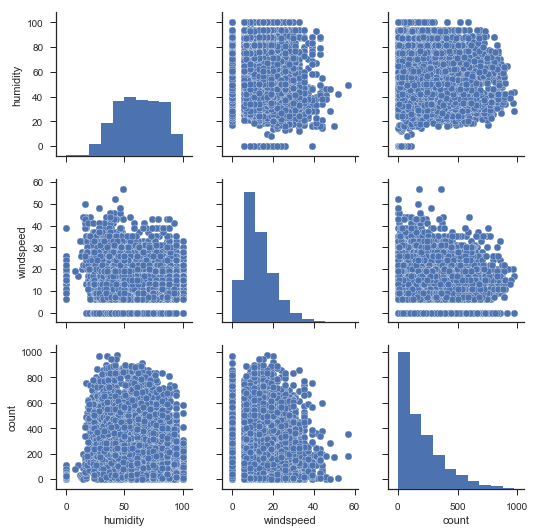

In [184]:
sns.pairplot(df[['humidity','windspeed','count']])

From the histogram between count and humidity, there is no obvious change in demand with humidity.

From the scatter plot between count and windspeed, there is a negative correlation between them.

#### Demand vs season

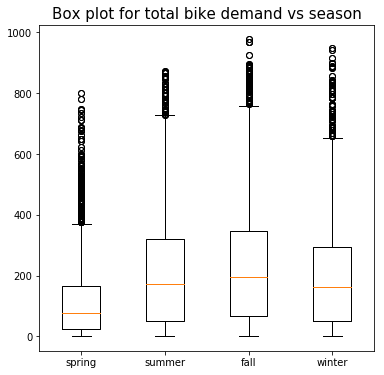

In [168]:
fig = plt.figure(figsize = (6, 6))

# Group the counts by each season
season_list = [df.index[df['season'] == x].tolist() for x in range(1,5)] 
count_list = [df['count'][k] for k in [v for v in season_list]]

# Make the boxplot of counts vs season
_ = plt.boxplot(count_list, labels = ['spring', 'summer', 'fall', 'winter'])
plt.tick_params(labelsize = 10)
_ = plt.title("Box plot for total bike demand vs season", fontsize = 15)

The bike demand is the lowest in spring and highest in fall, which is affected by the change in temperature.


#### Demand vs weather

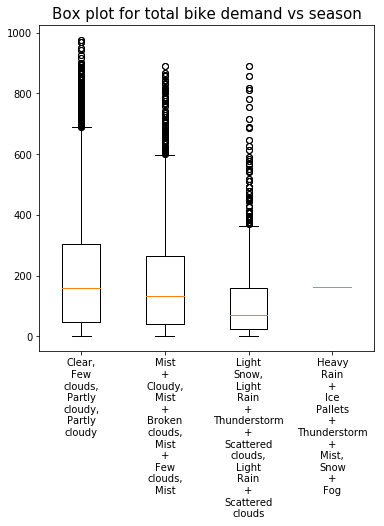

In [169]:
fig = plt.figure(figsize = (6, 6))

# Group the counts by each weather
season_list = [df.index[df['weather'] == x].tolist() for x in range(1,5)] 
count_list = [df['count'][k] for k in [v for v in season_list]]

keys = ['Clear, Few clouds, Partly cloudy, Partly cloudy ', 
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']

lbls = []
for i in keys:
    lbls.append(re.sub(r'\s+', '\n', i))
    
# Make the boxplot of counts vs weather
_ = plt.boxplot(count_list, labels = lbls)
plt.tick_params(labelsize = 10)
_ = plt.title("Box plot for total bike demand vs season", fontsize = 15)

From the above box plot, it can be seen that the bike demand drops as the weather condition becomes worse. For the heavy rainy and snowy days, the bike demands are close to zero.

#### Demand vs holiday and non-holiday

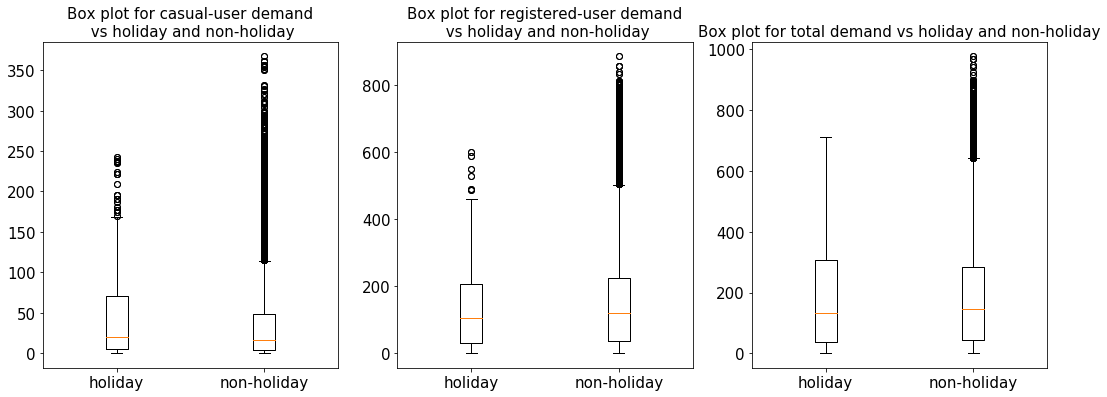

In [171]:
fig = plt.figure(figsize = (18, 6))

# Group the counts by holiday
holiday = df.index[df['holiday'] == 1].tolist()
non_holiday = df.index[df['holiday'] == 0].tolist()

casual_h = [df['casual'][k] for k in holiday]
casual_nh = [df['casual'][k] for k in non_holiday]
registered_h = [df['registered'][k] for k in holiday]
registered_nh = [df['registered'][k] for k in non_holiday]
total_h = [df['count'][k] for k in holiday]
total_nh = [df['count'][k] for k in non_holiday]

# Make box plot of casual users vs holiday and non-holiday
ax1 = fig.add_subplot(1,3,1)

_ = plt.boxplot([casual_h, casual_nh], labels = ['holiday', 'non-holiday'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for casual-user demand\n vs holiday and non-holiday", fontsize = 15)


# Make box plot of registered users vs holiday and non-holiday
ax2 = fig.add_subplot(1,3,2)

_ = plt.boxplot([registered_h, registered_nh], labels = ['holiday', 'non-holiday'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for registered-user demand\n vs holiday and non-holiday", fontsize = 15)


# Make box plot of total demand vs holiday and non-holiday
ax3 = fig.add_subplot(1,3,3)

_ = plt.boxplot([total_h, total_nh], labels = ['holiday', 'non-holiday'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for total demand vs holiday and non-holiday", fontsize = 15)

For casual users，there are more bike demands on holiday than non-holiday.

For registered users，there is no obvious difference between holiday and non-holiday.


#### Demand vs workingday and weekend

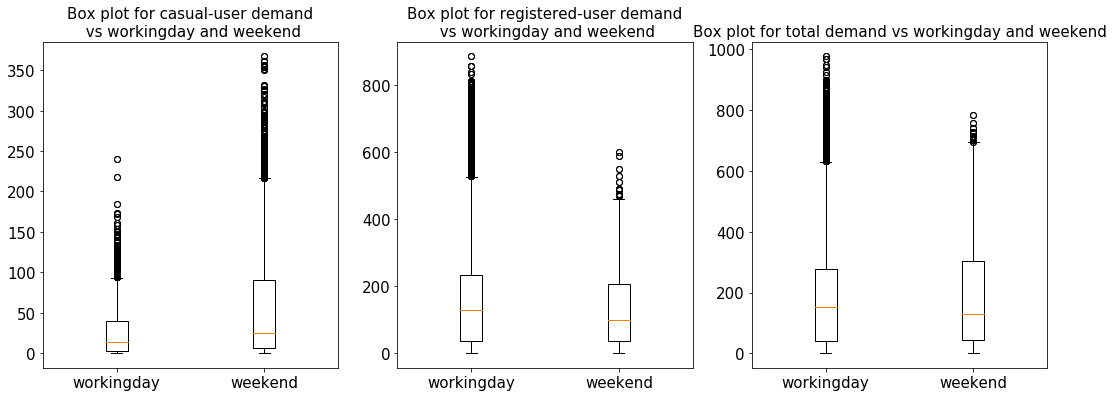

In [173]:
fig = plt.figure(figsize = (18, 6))

# Group the counts by workingday
workingday = df.index[df['workingday'] == 1].tolist()
weekend = df.index[df['workingday'] == 0].tolist()

casual_w = [df['casual'][k] for k in workingday]
casual_wk = [df['casual'][k] for k in weekend]
registered_w = [df['registered'][k] for k in workingday]
registered_wk = [df['registered'][k] for k in weekend]
total_w = [df['count'][k] for k in workingday]
total_wk = [df['count'][k] for k in weekend]

# Make box plot of casual users vs holiday and non-holiday
ax1 = fig.add_subplot(1,3,1)

_ = plt.boxplot([casual_w, casual_wk], labels = ['workingday', 'weekend'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for casual-user demand\n vs workingday and weekend", fontsize = 15)


# Make box plot of registered users vs holiday and non-holiday
ax2 = fig.add_subplot(1,3,2)

_ = plt.boxplot([registered_w, registered_wk], labels = ['workingday', 'weekend'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for registered-user demand\n vs workingday and weekend", fontsize = 15)


# Make box plot of total demand vs holiday and non-holiday
ax3 = fig.add_subplot(1,3,3)

_ = plt.boxplot([total_w, total_wk], labels = ['workingday', 'weekend'])
plt.tick_params(labelsize = 15)
_ = plt.title("Box plot for total demand vs workingday and weekend", fontsize = 15)


For casual users, there are much more bike demand on weekend than workingday.

For registered users, there are not obvious difference between workingday and weekend.


### Data selection for continued analysis

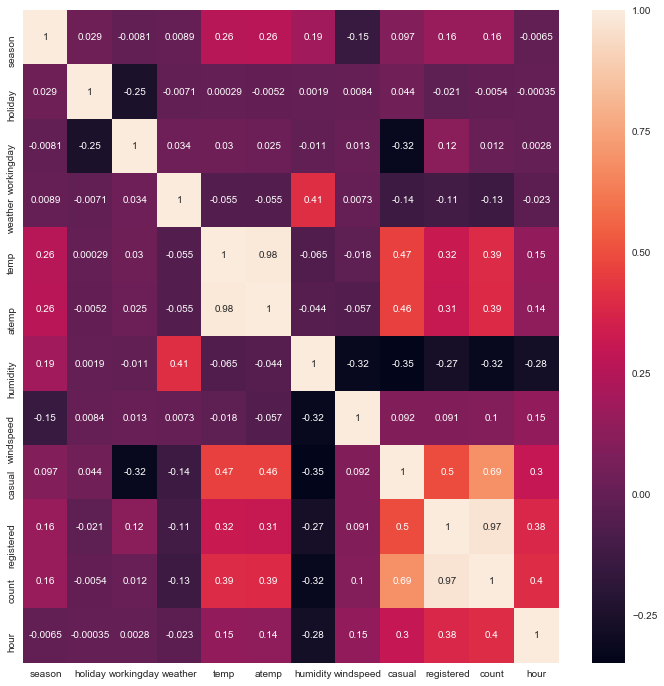

In [197]:
fig, ax = plt.subplots(figsize = (12, 12))

# Heatmap of the correlation matrix
ax = sns.heatmap(df.corr(), annot=True)

The correlation coefficient between temp and atemp is 0.98, which is very close to 1. Therefore, we can drop one of the features for future analysis.

The correlation coefficient between count and temp is 0.39, which shows a relatively strong positive correlation between them.

The correlation coefficient between casual and workingday is -0.32, which corresponds with the previous analysis.

The correlation coefficient between count and humidity is -0.32, which shows a relatively strong negative correlation between them.